In [1]:
import random
import string

def generate_sequences(num_samples):
    sequences = []
    answers = []

    for _ in range(num_samples):
        letters = random.sample(string.ascii_uppercase, 4)
        random.shuffle(letters)
        
        prompts = [
            f"If {letters[2]} leads to {letters[3]}, {letters[1]} leads to {letters[2]}, and {letters[0]} leads to {letters[1]}, then {letters[0]} will eventually lead to <strong>"
        ]
        
        sequences.append(prompts[0])
        answers.append(letters[3])

    return sequences, answers

prompts_5, answers_5 = generate_sequences(50)

In [9]:
import random
import string

def generate_sequences(num_samples, transitive_length, fake_prob=0.5, randomize_prob=0.5):
    sequences = []
    answers = []

    for _ in range(num_samples):
        # Generate transitive sequence letters
        transitive_letters = random.sample(string.ascii_uppercase, transitive_length + 1)
        
        # Create the transitive property sequence
        transitive_relations = [(transitive_letters[i], transitive_letters[i+1]) for i in range(transitive_length)]
        
        # Randomly shuffle the transitive relations based on randomize_prob
        if random.random() < randomize_prob:
            random.shuffle(transitive_relations)
        
        # Optionally add fake sequences based on fake_prob
        fake_sequences = []
        if random.random() < fake_prob:
            num_fake_sequences = random.randint(1, 2)  # Add 1 or 2 fake sequences
            for _ in range(num_fake_sequences):
                fake_letters = random.sample(string.ascii_uppercase, 2)
                while set(fake_letters).intersection(set(transitive_letters)):
                    fake_letters = random.sample(string.ascii_uppercase, 2)
                fake_sequences.append((fake_letters[0], fake_letters[1]))

        # Combine real and fake sequences and shuffle if needed
        all_relations = transitive_relations + fake_sequences
        if random.random() < randomize_prob:
            random.shuffle(all_relations)
        
        # Create the prompt
        prompt_parts = [f"{a} leads to {b}" for a, b in all_relations]
        prompt = f"If {', '.join(prompt_parts)}, then {transitive_letters[0]} will eventually lead to <strong>"
        
        # Append to results
        sequences.append(prompt)
        answers.append(transitive_letters[-1])

    return sequences, answers

# Example usage with knobs
prompts_5, answers_5 = generate_sequences(50, 3, fake_prob=0.7, randomize_prob=0.8)

for i in range(5):  # Display first 5 prompts and answers as a sample
    print(f"Prompt: {prompts_5[i]}")
    print(f"Answer: {answers_5[i]}")



Prompt: If K leads to W, W leads to O, O leads to U, Q leads to R, then K will eventually lead to <strong>
Answer: U
Prompt: If R leads to W, W leads to C, E leads to R, S leads to Y, B leads to Z, then E will eventually lead to <strong>
Answer: C
Prompt: If P leads to J, B leads to O, U leads to L, Y leads to Z, Z leads to P, then Y will eventually lead to <strong>
Answer: J
Prompt: If Z leads to J, V leads to Z, J leads to H, T leads to O, then V will eventually lead to <strong>
Answer: H
Prompt: If X leads to L, L leads to C, Z leads to P, C leads to W, then X will eventually lead to <strong>
Answer: W


In [17]:
import os
from tqdm import tqdm

# Suppress tqdm progress bars
tqdm().disable = True
os.environ['TOKENIZERS_PARALLELISM'] = 'false'
def test_performance(prompt_list, answer_list, model, max_new_tokens=1, temperature=0.4):
    tokens = model.to_tokens(prompt_list, prepend_bos=True)
    op = model.generate(tokens, max_new_tokens=1, temperature=0.4)
    corr = 0
    for ind, val in enumerate(prompt_list):
        # print("Prompt: "+val)
        # print("Expected Answer: "+answer_list[ind])
        # print("Model Answer: "+ model.to_string(op[ind, -1]))
        if answer_list[ind] == model.to_string(op[ind, -1]):
            corr+=1
    return corr*100/len(prompt_list)


0it [00:00, ?it/s]

In [5]:
import torch
import transformer_lens.utils as utils
import plotly.express as px
import tqdm
from functools import partial
import einops
import plotly.graph_objects as go
if torch.cuda.is_available():
    device = "cuda"
# elif torch.backends.mps.is_available():
#     device = "mps"
else: 
    device = "cpu"
torch.set_grad_enabled(False)
!nvidia-smi


Sun Jul  7 22:38:02 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.161.08             Driver Version: 535.161.08   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-PCIE-40GB          On  | 00000000:06:00.0 Off |                    0 |
| N/A   32C    P0              33W / 250W |      3MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [6]:
from sae_lens import HookedSAETransformer
model_gemma: HookedSAETransformer = HookedSAETransformer.from_pretrained("gemma-2b").to(device)

Gemma's activation function should be approximate GeLU and not exact GeLU.
Changing the activation function to `gelu_pytorch_tanh`.if you want to use the legacy `gelu`, edit the `model.config` to set `hidden_activation=gelu`   instead of `hidden_act`. See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Loaded pretrained model gemma-2b into HookedTransformer
Moving model to device:  cuda


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

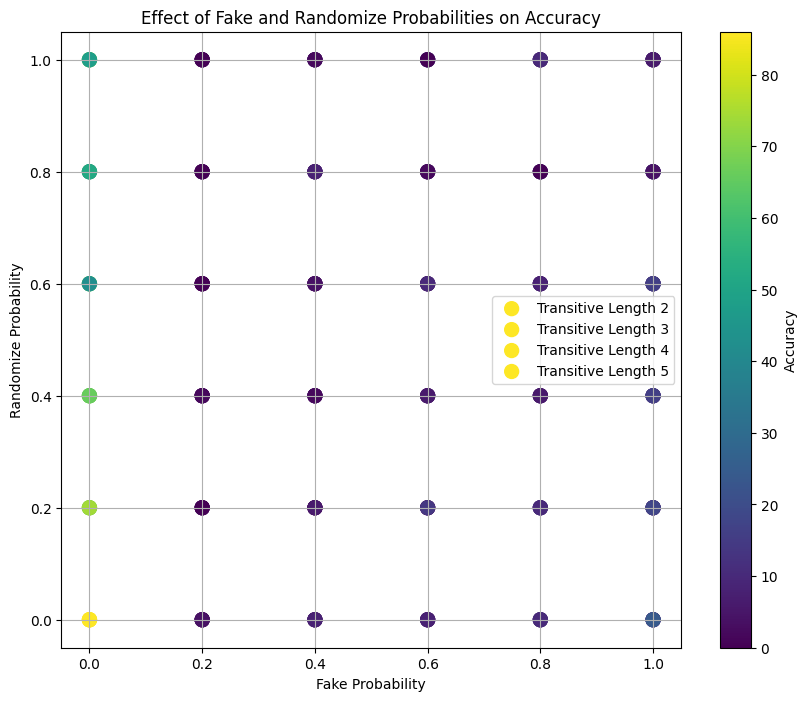

In [18]:
import numpy as np
import matplotlib.pyplot as plt
# Define the ranges for fake_prob, randomize_prob, and transitive_length
fake_prob_values = np.arange(0, 1.1, 0.2)
randomize_prob_values = np.arange(0, 1.1, 0.2)
transitive_length_values = range(2, 6)  # For example, transitive lengths from 2 to 5

# Store the results
results = []

# Sweep through values and test performance
for transitive_length in transitive_length_values:
    for fake_prob in fake_prob_values:
        for randomize_prob in randomize_prob_values:
            prompts, answers = generate_sequences(50, transitive_length, fake_prob=fake_prob, randomize_prob=randomize_prob)
            accuracy = test_performance(prompts, answers, model_gemma)
            results.append((transitive_length, fake_prob, randomize_prob, accuracy))



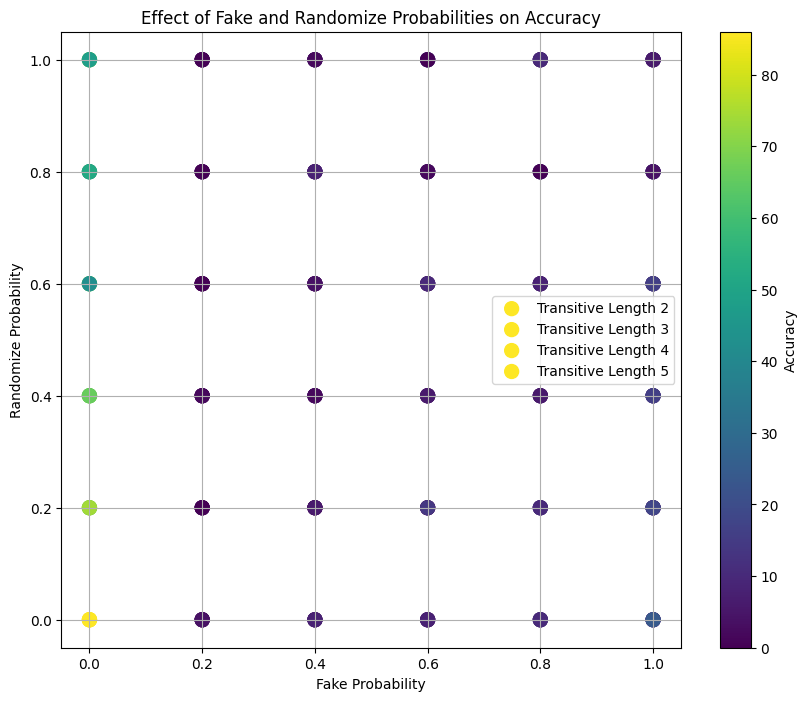

In [19]:
# Convert results to a structured array
results_array = np.array(results, dtype=[('transitive_length', 'i4'), ('fake_prob', 'f4'), ('randomize_prob', 'f4'), ('accuracy', 'f4')])

# Plot the results
fig, ax = plt.subplots(figsize=(10, 8))
for transitive_length in transitive_length_values:
    subset = results_array[results_array['transitive_length'] == transitive_length]
    scatter = ax.scatter(subset['fake_prob'], subset['randomize_prob'], c=subset['accuracy'], cmap='viridis', s=100, label=f'Transitive Length {transitive_length}')

ax.set_xlabel('Fake Probability')
ax.set_ylabel('Randomize Probability')
ax.set_title('Effect of Fake and Randomize Probabilities on Accuracy')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

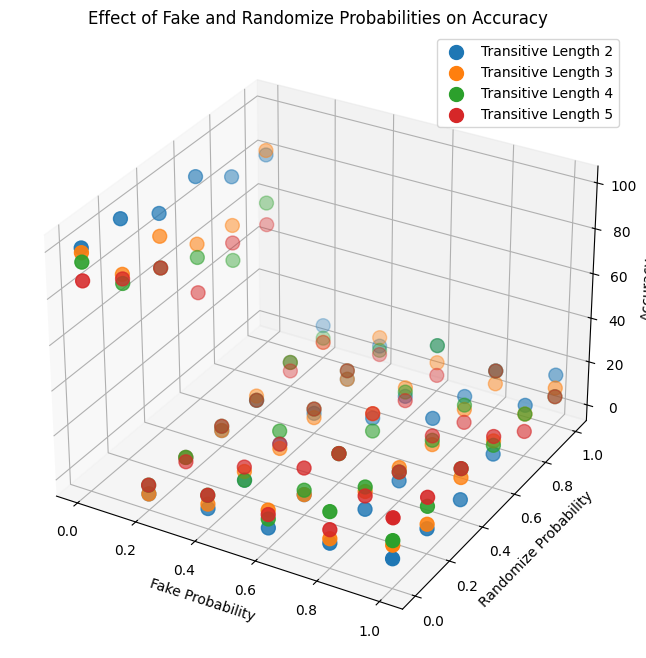

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Convert results to a structured array
results_array = np.array(results, dtype=[('transitive_length', 'i4'), ('fake_prob', 'f4'), ('randomize_prob', 'f4'), ('accuracy', 'f4')])

# Define the ranges for fake_prob, randomize_prob, and transitive_length
fake_prob_values = np.arange(0, 1.1, 0.2)
randomize_prob_values = np.arange(0, 1.1, 0.2)
transitive_length_values = range(2, 6)  # For example, transitive lengths from 2 to 5

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with different colors for each transitive length
for transitive_length in transitive_length_values:
    subset = results_array[results_array['transitive_length'] == transitive_length]
    scatter = ax.scatter(subset['fake_prob'], subset['randomize_prob'], subset['accuracy'], s=100, label=f'Transitive Length {transitive_length}')

ax.set_xlabel('Fake Probability')
ax.set_ylabel('Randomize Probability')
ax.set_zlabel('Accuracy')
ax.set_title('Effect of Fake and Randomize Probabilities on Accuracy')

# Add a legend
ax.legend()

# Show the plot
plt.show()

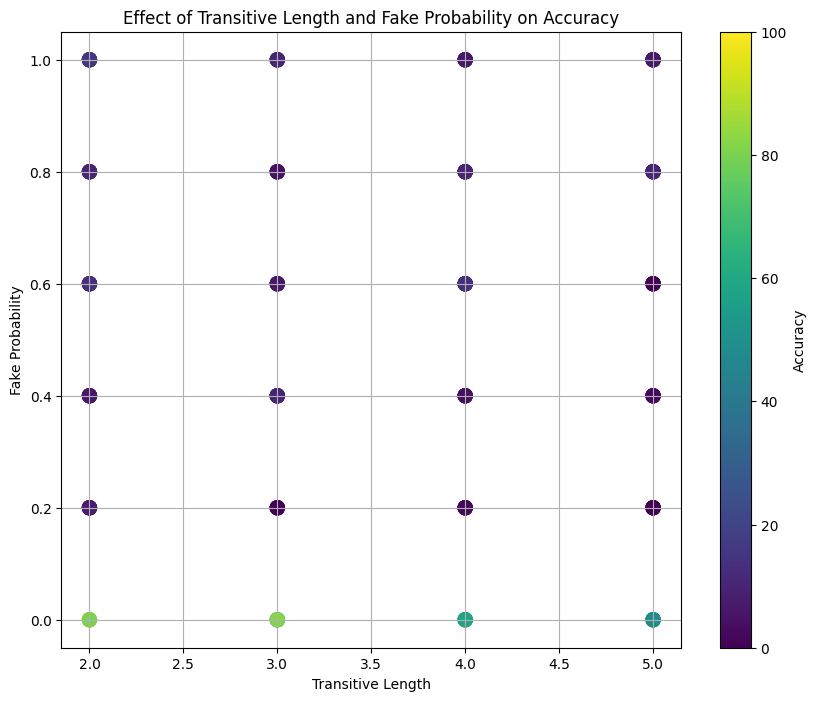

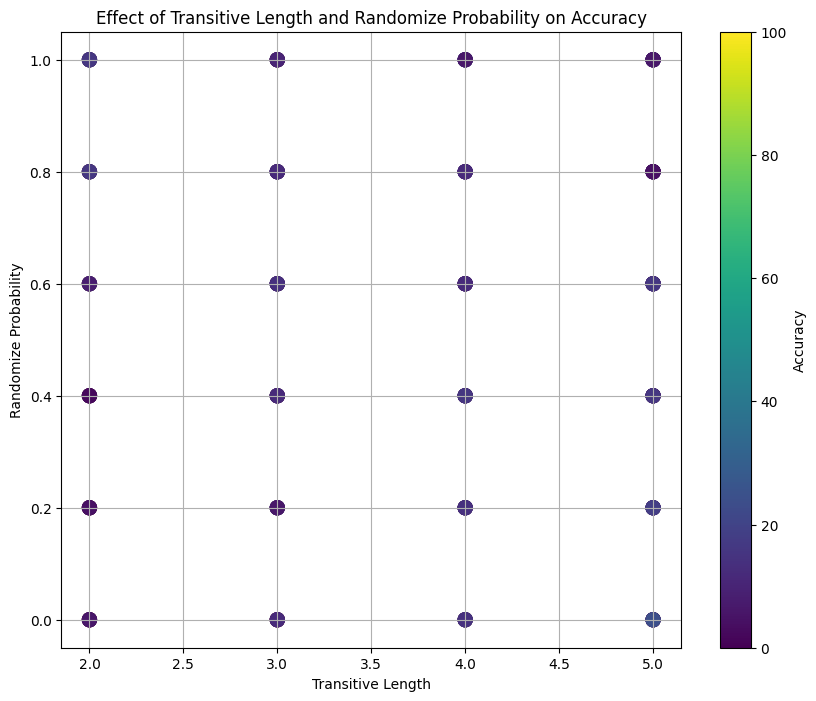

In [24]:
# Convert results to a structured array
results_array = np.array(results, dtype=[('transitive_length', 'i4'), ('fake_prob', 'f4'), ('randomize_prob', 'f4'), ('accuracy', 'f4')])

# Define the ranges for fake_prob, randomize_prob, and transitive_length
fake_prob_values = np.arange(0, 1.1, 0.2)
randomize_prob_values = np.arange(0, 1.1, 0.2)
transitive_length_values = range(2, 6)  # For example, transitive lengths from 2 to 5

# Plot 1: Transitive Length vs Fake Probability on Accuracy
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(results_array['transitive_length'], results_array['fake_prob'], c=results_array['accuracy'], cmap='viridis', s=100)
ax.set_xlabel('Transitive Length')
ax.set_ylabel('Fake Probability')
ax.set_title('Effect of Transitive Length and Fake Probability on Accuracy')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.grid(True)

# Plot 2: Transitive Length vs Randomize Probability on Accuracy
fig, ax = plt.subplots(figsize=(10, 8))
scatter = ax.scatter(results_array['transitive_length'], results_array['randomize_prob'], c=results_array['accuracy'], cmap='viridis', s=100)
ax.set_xlabel('Transitive Length')
ax.set_ylabel('Randomize Probability')
ax.set_title('Effect of Transitive Length and Randomize Probability on Accuracy')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.grid(True)

plt.show()

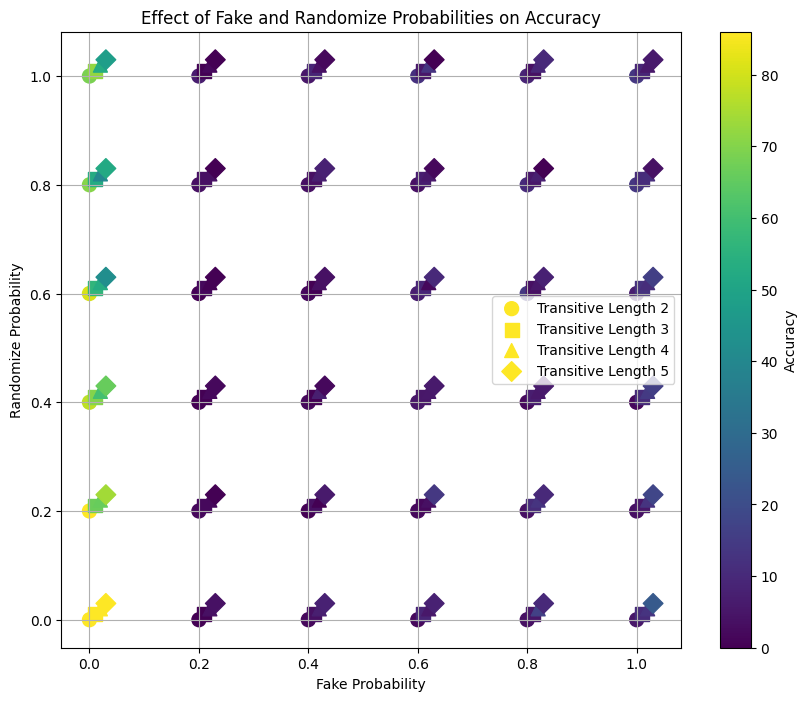

In [26]:
# Convert results to a structured array
results_array = np.array(results, dtype=[('transitive_length', 'i4'), ('fake_prob', 'f4'), ('randomize_prob', 'f4'), ('accuracy', 'f4')])

# Define the ranges for fake_prob, randomize_prob, and transitive_length
fake_prob_values = np.arange(0, 1.1, 0.2)
randomize_prob_values = np.arange(0, 1.1, 0.2)
transitive_length_values = range(2, 6)  # For example, transitive lengths from 2 to 5

# Define distinct markers for different transitive lengths
markers = ['o', 's', '^', 'D', 'v']

# Plot the results with displacement and different markers
fig, ax = plt.subplots(figsize=(10, 8))
displacement = 0.01  # Adjust this value to control the amount of displacement
for i, transitive_length in enumerate(transitive_length_values):
    subset = results_array[results_array['transitive_length'] == transitive_length]
    marker = markers[i % len(markers)]
    scatter = ax.scatter(
        subset['fake_prob'] + i * displacement, 
        subset['randomize_prob'] + i * displacement, 
        c=subset['accuracy'], 
        cmap='viridis', 
        s=100, 
        marker=marker,
        label=f'Transitive Length {transitive_length}'
    )

ax.set_xlabel('Fake Probability')
ax.set_ylabel('Randomize Probability')
ax.set_title('Effect of Fake and Randomize Probabilities on Accuracy')
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
prompts, answers = generate_sequences(50, 5, fake_prob=0, randomize_prob=0.8)
accuracy = test_performance(prompts, answers, model_gemma)
accuracy

  0%|          | 0/1 [00:00<?, ?it/s]

44.0